In [1]:
import torch
print(torch.__version__)

2.0.0+cpu


In [2]:
import gymnasium as gym
from gym.wrappers import FrameStack
from utils import preprocess_state

In [3]:
env = gym.make("ALE/AirRaid-v5")

# Apply frame stacking
#num_frames = 4
#env = FrameStack(env, num_frames)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
state_info = env.reset()

In [14]:
state_info[0].shape

(250, 160, 3)

In [7]:
state_1 = preprocess_state(state_info[0],device)
state_1.shape

torch.Size([80, 80])

In [8]:
import matplotlib.pyplot as plt

In [11]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env)
    plt.title("Step: %d %s" % (step, info))
    plt.axis('off')
    #display.clear_output(wait=True)
    plt.show()

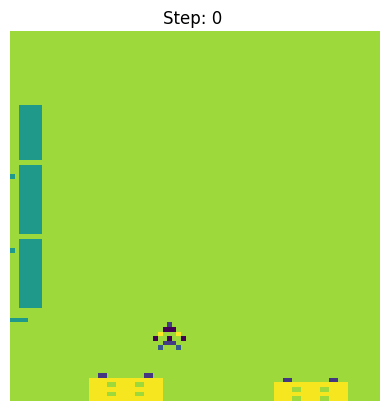

In [12]:
show_state(state_1)

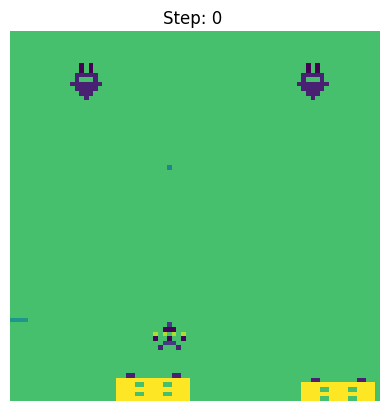

In [16]:
observation = env.step(1)
for skip in range(2): # skip the start of each game/
    observation = env.step(0)
preprocessed_state = preprocess_state(observation[0],device)
show_state(preprocessed_state)
